#### Hough Transform, a.k.a. HoughLines for Straight Line(s) Detection

Workflow: -
1. Read image into BGR color image buffer
2. Convert to GRAY
3. Edge Detection pre-processing (using Canny method which is a multi-stage computation involving noise removal=> Sobel filters based gradient estimation => non-maximum pixels supression => thresholding)
4. HoughLines stright lines detection

Further Context: -
* Hough algorithms is actually a Transform which converts x/y axis into target curve parameteric space (e.g., slope & intercept for lines)
* Hough Transform can detect edges defined by parametric curves (say parabola, ellipsis, circle, line, etc)
* HoughLines is a special case or simplest case for straight lines detection

* Irregular shapes or boundary can be detected through chaining-of-edges

* Related features detection requirements are
    * Edges chaining for detecting irregular shapes or countours or boundaries
    * Dotted lines detection
    * Lines removal for document tables processing, Morphological operations (erosion, dilation)

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
# OpenCV reads image in BGR format
imgBGR = cv2.imread('hough_lines_edges_detection_01.png') 
imgBGR.shape

(498, 1017, 3)

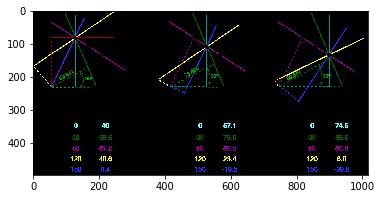

In [3]:
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

In [4]:
# For edges or lines detection, it should not matter much as how Color channels are mapped to Gray (average or luminosity
# OpenCV::cvtColor uses luminosity formulae (Y = 0.299 R + 0.587 G + 0.114 B) as Gray
imgGRAY = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
imgGRAY.shape

(498, 1017)

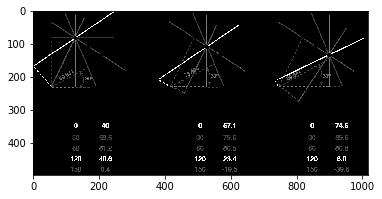

In [5]:
# When image shape is (M,N,3) or (M,N,4), it is interpreted as RGB or RGBA values & 'cmap' is ignored
# Must use 'cmap' for gray & even for other shapes image
plt.imshow(imgGRAY[..., :], cmap = 'gray')
plt.show()

In [6]:
# Canny algorithm for edge detection
# Low threshold: 50
# High threshold: 200
imgEDGES = cv2.Canny(imgGRAY, 50, 200, apertureSize = 3) 
imgEDGES.shape

(498, 1017)

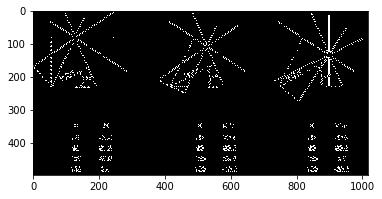

In [7]:
plt.imshow(imgEDGES[...,:], cmap = 'gray')
plt.show()

In [8]:
# Array of edges (r and theta) 
# rho (1) : The resolution-in-pixels of r vector
# threshold (200): The minimum number of intersections in Hough space to “detect” a line
edgesVec = cv2.HoughLines(imgEDGES, 1, np.pi/180, 200) 
edgesVec.shape

(11, 1, 2)

In [9]:
for i in range(len(edgesVec)):
    r = edgesVec[i,0,0]
    theta = edgesVec[i,0,1]
    
    a = np.cos(theta) 
    b = np.sin(theta) 

    x0 = a*r 
    y0 = b*r 

    x1 = int(x0 + 1000*(-b)) 
    y1 = int(y0 + 1000*(a)) 

    x2 = int(x0 - 1000*(-b)) 
    y2 = int(y0 - 1000*(a)) 

    # Overlay detected edges on the original image
    cv2.line(imgBGR,(x1,y1), (x2,y2), (255,255,255), 5) 

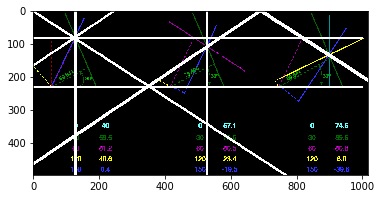

In [10]:
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()